In [66]:
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN

In [67]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

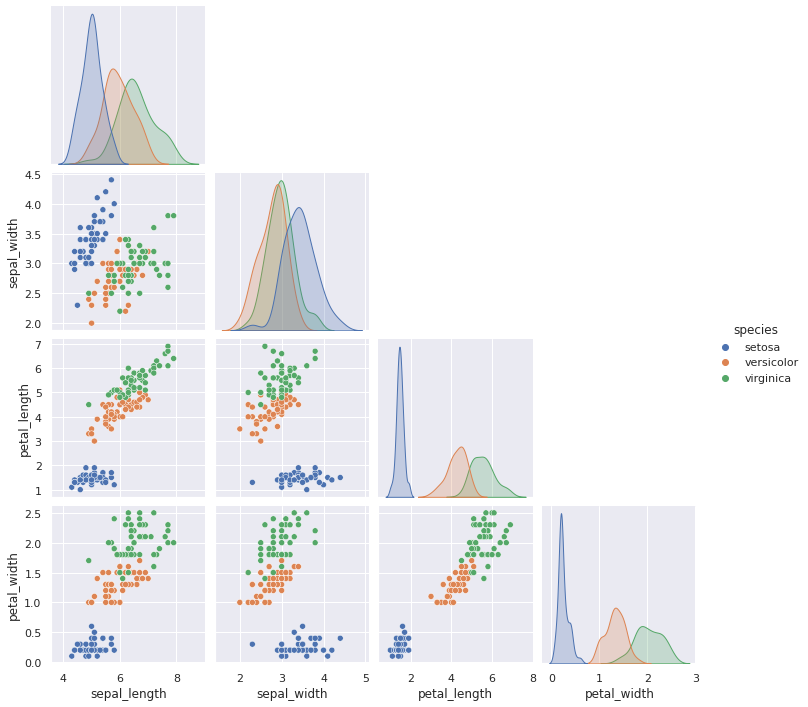

In [68]:
sns.pairplot(iris, hue='species', corner=True)

In [69]:
Y = iris['species'].astype('category').cat.codes
X = iris.drop('species', axis="columns")

In [70]:
X.shape, Y.shape

((150, 4), (150,))

### Séparation des données en un TRAINING set et un TEST set

In [71]:
splits = train_test_split(X, Y,
                          train_size=0.3, # Pourcentage de découpage
                          stratify=Y,
                          random_state=2)
print(type(splits))

<class 'list'>


In [72]:
len(splits)

4

### Vérification des train/test

In [73]:
for each in splits:
    print(each.shape)

(45, 4)
(105, 4)
(45,)
(105,)


In [74]:
X_train, X_test, Y_train, Y_test = splits

In [75]:
def get_accuracy(preds, target):
    m = target.shape[0] # nombre d'exemples
    total_correct = (preds == target).sum()
    accuracy = total_correct / m
    return str(round(accuracy * 100, 2)) + "%"

In [76]:
knn = KNN(n_neighbors=3)
print(knn)

KNeighborsClassifier(n_neighbors=3)


In [77]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [78]:
preds = knn.predict(X_test)
get_accuracy(preds, Y_test)

'94.29%'